In [174]:
%%html
<div>
    <img src="https://www.camoni.co.il/webfiles/images/cache/782X426/zcX1/webfiles/camoni/cms_files/headers/header_151212041.jpg" width="800" alt="Reading Pandas"/>
    <figcaption style="text-align:center;">
        <small></small>
    </figcaption>
</div>

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import date
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [35]:
url = 'https://raw.githubusercontent.com/ariel7525/Wellbeing_and_lifestyle_data_Kaggle/main/Wellbeing_and_lifestyle_data_Kaggle.csv'
life_df = pd.read_csv(url)

In [36]:
life_df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,07/07/2015,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,07/07/2015,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,07/07/2015,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,07/07/2015,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,07/07/2015,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [ ]:
#כמה פירות וירקות אתה צורך ביום ומי צורך יותר מבוגרים או ילדים? גברים או נשים? ואיך צריכת ירקות ופירות משפיעות על מספר הצעדים היומי שלך   ?

In [98]:
# סופרים את מספר הגברים והנשים
gender_counts = data['GENDER'].value_counts()

# מדפיסים את התוצאות
print(f"מספר הנשים: {gender_counts['Female']}")
print(f"מספר הגברים: {gender_counts['Male']}")

מספר הנשים: 9858
מספר הגברים: 6114


In [ ]:
#גרף עוגה של מספר נשים וגברים במחקר 

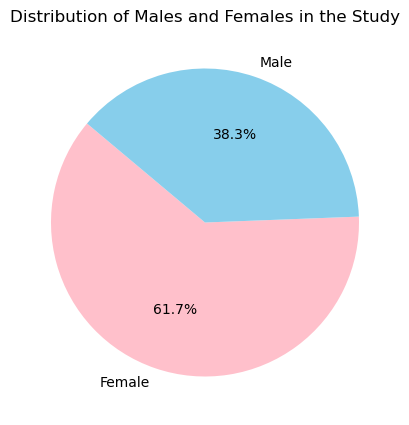

In [126]:
# Calculate the number of males and females in the dataset
gender_counts = life_df['GENDER'].value_counts()

# Plotting the pie chart for the number of males and females
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'skyblue'])
plt.title('Distribution of Males and Females in the Study')
plt.show()

In [ ]:
# כמה גברים אוכלים פירות וירקות וכמה נשים אוכלות ?

In [100]:
# Count the number of females who ate fruits and veggies
num_females_fruits = life_df[(life_df['GENDER'] == 'Female') & (life_df['FRUITS_VEGGIES'] > 0)].shape[0]

# Count the number of males who ate fruits and veggies
num_males_fruits = life_df[(life_df['GENDER'] == 'Male') & (life_df['FRUITS_VEGGIES'] > 0)].shape[0]

print("מספר הנשים שאכלו פירות וירקות:", num_females_fruits)
print("מספר הגברים שאכלו פירות וירקות:", num_males_fruits)

מספר הנשים שאכלו פירות וירקות: 9602
מספר הגברים שאכלו פירות וירקות: 5818


In [ ]:
#פילוח לפי שכבות גיל באוכלוסיה בקרב גברים שכן אוכלים פירות וירקות 

In [103]:


# Define the age order
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']

# Filter and group males who ate fruits and veggies by age
male_fruits_by_age = life_df[(life_df['GENDER'] == 'Male') & (life_df['FRUITS_VEGGIES'] > 0)]\
    .groupby('AGE').size().reset_index(name='COUNT')

# Sort by age order
male_fruits_by_age['AGE'] = pd.Categorical(male_fruits_by_age['AGE'], categories=age_order, ordered=True)
male_fruits_by_age = male_fruits_by_age.sort_values('AGE').reset_index(drop=True)

print(male_fruits_by_age)

            AGE  COUNT
0  Less than 20    698
1      21 to 35   2411
2      36 to 50   1630
3    51 or more   1079


In [ ]:
#פילוח לפי שכבות גיל באוכלוסיה בקרב נשים שכן אוכלות פירות וירקות

In [104]:

# Define the age order
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']

# Filter and group females who ate fruits and veggies by age
female_fruits_by_age = life_df[(life_df['GENDER'] == 'Female') & (life_df['FRUITS_VEGGIES'] > 0)]\
    .groupby('AGE').size().reset_index(name='COUNT')

# Sort by age order
female_fruits_by_age['AGE'] = pd.Categorical(female_fruits_by_age['AGE'], categories=age_order, ordered=True)
female_fruits_by_age = female_fruits_by_age.sort_values('AGE').reset_index(drop=True)

print(female_fruits_by_age)

            AGE  COUNT
0  Less than 20   1020
1      21 to 35   3424
2      36 to 50   2906
3    51 or more   2252


In [96]:
#ניתן לראות שהשכבת גיל שצורכת הכי הרבה פירות וירקות בקרב גברים ונשים היא 21-35 

In [160]:
%%html
<div>
    <img src="https://www.shvoong.co.il/wp-content/uploads/2020/12/shutterstock_3211583961.jpg" width="800" alt="Reading Pandas"/>
    <figcaption style="text-align:center;">
        <small></small>
    </figcaption>
</div>

In [105]:
#סכום הצעדים הכולל של כל המשתתפים במחקר 

In [106]:
# Calculate the total number of daily steps in the entire dataset
total_daily_steps = life_df['DAILY_STEPS'].sum()

total_daily_steps

91098

In [107]:
# כמה מתוכם נשים וכמה גברים 

In [132]:
# Calculate the total number of daily steps for females and males in the entire dataset
total_female_steps_all = life_df[life_df['GENDER'] == 'Female']['DAILY_STEPS'].sum()
total_male_steps_all = life_df[life_df['GENDER'] == 'Male']['DAILY_STEPS'].sum()

print("מספר צעדים שצעדו נשים:")
print(total_female_steps_all)

print("מספר צעדים שצעדו גברים:")
print(total_male_steps_all)

מספר צעדים שצעדו נשים:
55381
מספר צעדים שצעדו גברים:
35717


In [ ]:
#גרף עוגה מיוחד לכמות צעדים גברים ונשים 

In [ ]:
# כמה מתוכם אלו נשים וגברים שצורכים פירות וירקות 

In [110]:

# Calculate the total number of daily steps for females who ate fruits and veggies
total_female_steps_fruits = life_df[(life_df['GENDER'] == 'Female') & (life_df['FRUITS_VEGGIES'] > 0)]['DAILY_STEPS'].sum()

# Calculate the total number of daily steps for males who ate fruits and veggies
total_male_steps_fruits = life_df[(life_df['GENDER'] == 'Male') & (life_df['FRUITS_VEGGIES'] > 0)]['DAILY_STEPS'].sum()

# Print the results
print("סכום הצעדים היומיים של נשים שאכלו פירות וירקות:", total_female_steps_fruits)
print("סכום הצעדים היומיים של גברים שאכלו פירות וירקות:", total_male_steps_fruits)

סכום הצעדים היומיים של נשים שאכלו פירות וירקות: 54333
סכום הצעדים היומיים של גברים שאכלו פירות וירקות: 34477


In [ ]:
#פילוח לפי גיל של כמות הצעדים היומית של גברים 

In [113]:
# Define the age order
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']

# Filter and group males by age and sum their daily steps
male_steps_by_age = life_df[life_df['GENDER'] == 'Male'].groupby('AGE')[['DAILY_STEPS']].sum().reset_index()

# Sort by age order
male_steps_by_age['AGE'] = pd.Categorical(male_steps_by_age['AGE'], categories=age_order, ordered=True)
male_steps_by_age = male_steps_by_age.sort_values('AGE').reset_index(drop=True)

print(male_steps_by_age)

            AGE  DAILY_STEPS
0  Less than 20         4615
1      21 to 35        14687
2      36 to 50        10068
3    51 or more         6347


In [162]:
#גרף צירים של פילוח לפי גיל כמות צעדים יומית גברים 

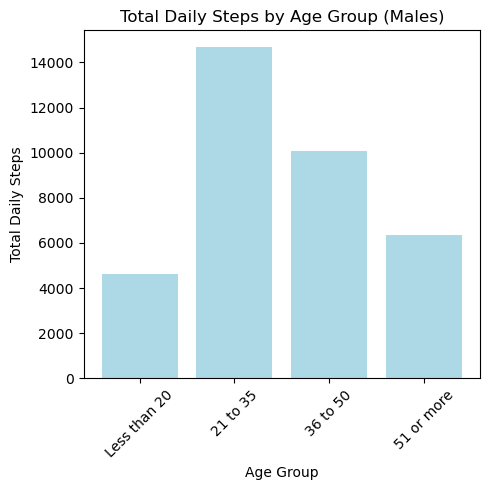

In [172]:
# Define the age order
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']

# Sample data (replace with your actual data)
data = {
    'AGE': ['Less than 20', '21 to 35', '36 to 50', '51 or more'],
    'DAILY_STEPS': [4615, 14687, 10068, 6347]  
}

# Create a DataFrame from the data
male_steps_by_age = pd.DataFrame(data)

# Sort by age order
male_steps_by_age['AGE'] = pd.Categorical(male_steps_by_age['AGE'], categories=age_order, ordered=True)
male_steps_by_age = male_steps_by_age.sort_values('AGE').reset_index(drop=True)

# Plotting the bar chart with lightblue bars
plt.figure(figsize=(5, 5))
bars = plt.bar(male_steps_by_age['AGE'], male_steps_by_age['DAILY_STEPS'], color='lightblue')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Daily Steps')
plt.title('Total Daily Steps by Age Group (Males)')

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [168]:

# Define the age order
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']

# Filter and group males by age and sum their daily steps
male_steps_by_age = life_df[life_df['GENDER'] == 'Male'].groupby('AGE')[['DAILY_STEPS']].sum().reset_index()

# Sort by age order
male_steps_by_age['AGE'] = pd.Categorical(male_steps_by_age['AGE'], categories=age_order, ordered=True)
male_steps_by_age = male_steps_by_age.sort_values('AGE').reset_index(drop=True)

print(male_steps_by_age)

            AGE  DAILY_STEPS
0  Less than 20         4615
1      21 to 35        14687
2      36 to 50        10068
3    51 or more         6347


In [ ]:
#פילוח לפי גיל של כמות צעדים יומית בקרב נשים 

In [114]:

# Define the age order
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']

# Filter and group females by age and sum their daily steps
female_steps_by_age = life_df[life_df['GENDER'] == 'Female'].groupby('AGE')[['DAILY_STEPS']].sum().reset_index()

# Sort by age order
female_steps_by_age['AGE'] = pd.Categorical(female_steps_by_age['AGE'], categories=age_order, ordered=True)
female_steps_by_age = female_steps_by_age.sort_values('AGE').reset_index(drop=True)

print(female_steps_by_age)

            AGE  DAILY_STEPS
0  Less than 20         6283
1      21 to 35        19482
2      36 to 50        16796
3    51 or more        12820


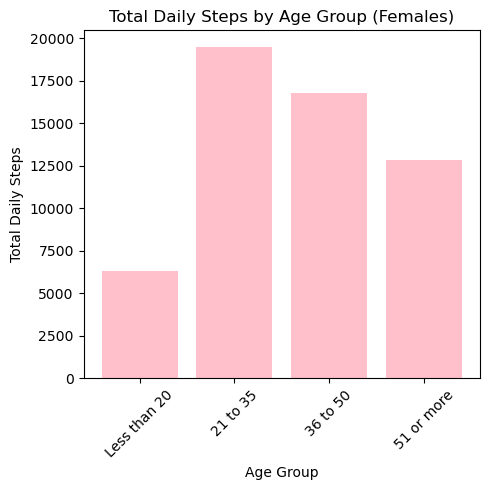

In [173]:
# Define the age order
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']

# Sample data (replace with your actual data)
data = {
    'AGE': ['Less than 20', '21 to 35', '36 to 50', '51 or more'],
    'DAILY_STEPS': [6283, 19482, 16796, 12820] 
}

# Create a DataFrame from the data
female_steps_by_age = pd.DataFrame(data)

# Sort by age order
female_steps_by_age['AGE'] = pd.Categorical(female_steps_by_age['AGE'], categories=age_order, ordered=True)
female_steps_by_age = female_steps_by_age.sort_values('AGE').reset_index(drop=True)

# Plotting the bar chart
plt.figure(figsize=(5, 5))
bars = plt.bar(female_steps_by_age['AGE'], female_steps_by_age['DAILY_STEPS'], color='pink')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Daily Steps')
plt.title('Total Daily Steps by Age Group (Females)')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#ניתן לראות גם פה שהאוכלוסיה שהולכת הכי הרבה היא 21-35 

In [ ]:
#פילוח לפי שכבות גיל באוכלוסיה של כמות צעדים יומית בקרב גברים שכן אוכל פירות וירקות

In [111]:

# Define the age order
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']

# Filter and group males who ate fruits and veggies by age and sum their daily steps
male_steps_fruits_by_age = life_df[(life_df['GENDER'] == 'Male') & (life_df['FRUITS_VEGGIES'] > 0)].groupby('AGE')[['DAILY_STEPS']].sum().reset_index()

# Sort by age order
male_steps_fruits_by_age['AGE'] = pd.Categorical(male_steps_fruits_by_age['AGE'], categories=age_order, ordered=True)
male_steps_fruits_by_age = male_steps_fruits_by_age.sort_values('AGE').reset_index(drop=True)

print(male_steps_fruits_by_age)

            AGE  DAILY_STEPS
0  Less than 20         4354
1      21 to 35        14082
2      36 to 50         9796
3    51 or more         6245


In [ ]:
#פילוח לפי שכבות גיל באוכלוסיה של כמות צעדים יומית בקרב נשים שכן אוכלות פירות וירקות

In [112]:
# Define the age order
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']

# Filter and group females who ate fruits and veggies by age and sum their daily steps
female_steps_fruits_by_age = life_df[(life_df['GENDER'] == 'Female') & (life_df['FRUITS_VEGGIES'] > 0)].groupby('AGE')[['DAILY_STEPS']].sum().reset_index()

# Sort by age order
female_steps_fruits_by_age['AGE'] = pd.Categorical(female_steps_fruits_by_age['AGE'], categories=age_order, ordered=True)
female_steps_fruits_by_age = female_steps_fruits_by_age.sort_values('AGE').reset_index(drop=True)

print(female_steps_fruits_by_age)

            AGE  DAILY_STEPS
0  Less than 20         6058
1      21 to 35        19020
2      36 to 50        16584
3    51 or more        12671


In [ ]:
#ניתן לשים לב כי מתוך 9858 גברים שהשתתפו במחקר 9602 גברים אוכלים פירות הדבר מעיד על יחס מאוד קטן

In [115]:
# ולכן המדגם לא מספק ויש צורך לצלול יותר פנימה ולבדוק את כמות הצעדים של אלו שאוכלים 0-2 ירקות ביום לעומת אלו שאוכלים 3-5 

In [119]:

# Define the age order
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']

# Filter, group, and count males who ate 0 to 2 fruits by age and sum their daily steps
male_steps_0_2_fruits_by_age = life_df[(life_df['GENDER'] == 'Male') & (life_df['FRUITS_VEGGIES'].between(0, 2))]\
    .groupby('AGE').agg({'DAILY_STEPS': 'sum', 'GENDER': 'count'}).reset_index().rename(columns={'GENDER': 'COUNT'})

# Sort by age order
male_steps_0_2_fruits_by_age['AGE'] = pd.Categorical(male_steps_0_2_fruits_by_age['AGE'], categories=age_order, ordered=True)
male_steps_0_2_fruits_by_age = male_steps_0_2_fruits_by_age.sort_values('AGE').reset_index(drop=True)

# Filter, group, and count males who ate 3 to 5 fruits by age and sum their daily steps
male_steps_3_5_fruits_by_age = life_df[(life_df['GENDER'] == 'Male') & (life_df['FRUITS_VEGGIES'].between(3, 5))]\
    .groupby('AGE').agg({'DAILY_STEPS': 'sum', 'GENDER': 'count'}).reset_index().rename(columns={'GENDER': 'COUNT'})

# Sort by age order
male_steps_3_5_fruits_by_age['AGE'] = pd.Categorical(male_steps_3_5_fruits_by_age['AGE'], categories=age_order, ordered=True)
male_steps_3_5_fruits_by_age = male_steps_3_5_fruits_by_age.sort_values('AGE').reset_index(drop=True)

print(" גברים שאכלו 0 עד 2 פירות וירקות:")
print(male_steps_0_2_fruits_by_age)

print("\nגברים שאכלו 3 עד 5 פירות וירקות:")
print(male_steps_3_5_fruits_by_age)

 גברים שאכלו 0 עד 2 פירות וירקות:
            AGE  DAILY_STEPS  COUNT
0  Less than 20         2136    383
1      21 to 35         7041   1366
2      36 to 50         3841    750
3    51 or more         1920    383

גברים שאכלו 3 עד 5 פירות וירקות:
            AGE  DAILY_STEPS  COUNT
0  Less than 20         2479    371
1      21 to 35         7646   1201
2      36 to 50         6227    944
3    51 or more         4427    716


In [ ]:
#עכשיו בקרב נשים 

In [121]:

# Define the age order
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']

# Filter, group, and count females who ate 0 to 2 fruits by age and sum their daily steps
female_steps_0_2_fruits_by_age = life_df[(life_df['GENDER'] == 'Female') & (life_df['FRUITS_VEGGIES'].between(0, 2))]\
    .groupby('AGE').agg({'DAILY_STEPS': 'sum', 'GENDER': 'count'}).reset_index().rename(columns={'GENDER': 'COUNT'})

# Sort by age order
female_steps_0_2_fruits_by_age['AGE'] = pd.Categorical(female_steps_0_2_fruits_by_age['AGE'], categories=age_order, ordered=True)
female_steps_0_2_fruits_by_age = female_steps_0_2_fruits_by_age.sort_values('AGE').reset_index(drop=True)

# Filter, group, and count females who ate 3 to 5 fruits by age and sum their daily steps
female_steps_3_5_fruits_by_age = life_df[(life_df['GENDER'] == 'Female') & (life_df['FRUITS_VEGGIES'].between(3, 5))]\
    .groupby('AGE').agg({'DAILY_STEPS': 'sum', 'GENDER': 'count'}).reset_index().rename(columns={'GENDER': 'COUNT'})

# Sort by age order
female_steps_3_5_fruits_by_age['AGE'] = pd.Categorical(female_steps_3_5_fruits_by_age['AGE'], categories=age_order, ordered=True)
female_steps_3_5_fruits_by_age = female_steps_3_5_fruits_by_age.sort_values('AGE').reset_index(drop=True)

print("נשים שאכלו 0 עד 2 פירות וירקות :")
print(female_steps_0_2_fruits_by_age)

print("\nנשים שאכלו 3 עד 5 פירות וירקות:")
print(female_steps_3_5_fruits_by_age)

נשים שאכלו 0 עד 2 פירות וירקות :
            AGE  DAILY_STEPS  COUNT
0  Less than 20         2567    493
1      21 to 35         7164   1519
2      36 to 50         5019   1056
3    51 or more         2624    593

נשים שאכלו 3 עד 5 פירות וירקות:
            AGE  DAILY_STEPS  COUNT
0  Less than 20         3716    572
1      21 to 35        12318   2022
2      36 to 50        11777   1905
3    51 or more        10196   1698


In [ ]:
#גרף מסכם 

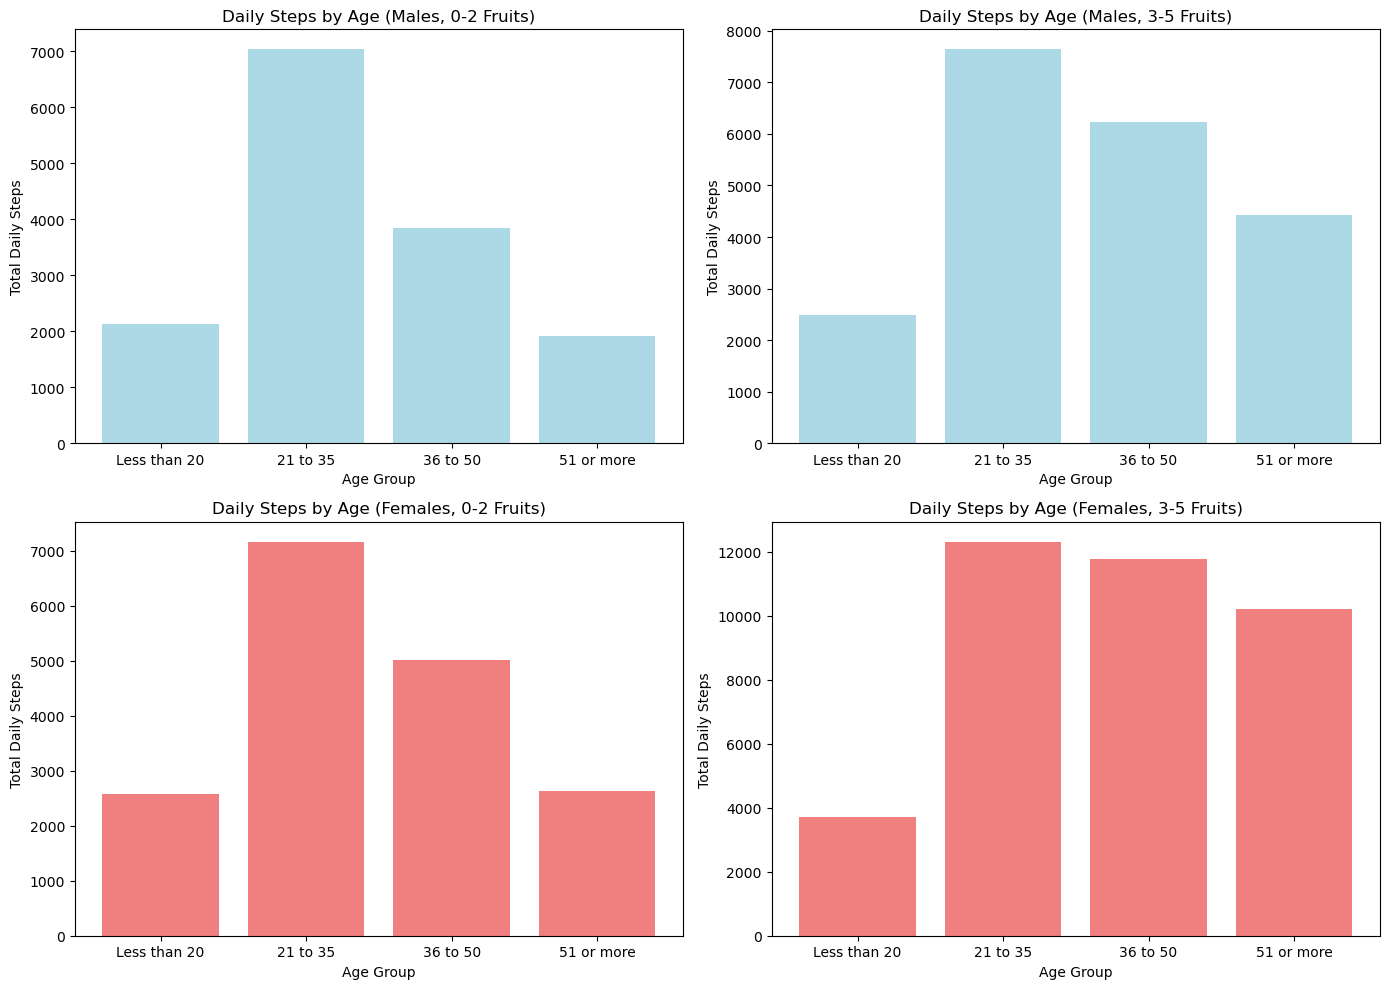

In [127]:
# Plotting the data for males and females who ate 0 to 2 fruits and 3 to 5 fruits with specified colors
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Colors
male_color = 'lightblue'
female_color = 'lightcoral'

# Males: 0 to 2 fruits
axes[0, 0].bar(male_steps_0_2_fruits_by_age['AGE'], male_steps_0_2_fruits_by_age['DAILY_STEPS'], color=male_color)
axes[0, 0].set_title('Daily Steps by Age (Males, 0-2 Fruits)')
axes[0, 0].set_xlabel('Age Group')
axes[0, 0].set_ylabel('Total Daily Steps')

# Males: 3 to 5 fruits
axes[0, 1].bar(male_steps_3_5_fruits_by_age['AGE'], male_steps_3_5_fruits_by_age['DAILY_STEPS'], color=male_color)
axes[0, 1].set_title('Daily Steps by Age (Males, 3-5 Fruits)')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Total Daily Steps')

# Females: 0 to 2 fruits
axes[1, 0].bar(female_steps_0_2_fruits_by_age['AGE'], female_steps_0_2_fruits_by_age['DAILY_STEPS'], color=female_color)
axes[1, 0].set_title('Daily Steps by Age (Females, 0-2 Fruits)')
axes[1, 0].set_xlabel('Age Group')
axes[1, 0].set_ylabel('Total Daily Steps')

# Females: 3 to 5 fruits
axes[1, 1].bar(female_steps_3_5_fruits_by_age['AGE'], female_steps_3_5_fruits_by_age['DAILY_STEPS'], color=female_color)
axes[1, 1].set_title('Daily Steps by Age (Females, 3-5 Fruits)')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Total Daily Steps')

plt.tight_layout()
plt.show()

 **מסקנה: הממצאים מצביעים על כך שייתכן שקיים יחס חיובי בין כמות הפירות והירקות שנאכלו לבין כמות הצעדים היומית. עם זאת, כדי להסיק מסקנות חד משמעיות, נדרשים ניתוחים סטטיסטיים נוספים ואימות של הממצאים על ידי ניתוחים מתקדמים נוספים.**